In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("D:\datasets\Mall_Customers.csv")
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
#data preprocessing
data = data.rename(columns={
    "Genre": "Gender",
    "Age": "Age",
    "Annual Income (k$)": "Annual Income",
    "Spending Score (1-100)": "Spending Score",
})
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
gender = {'Male':1, 'Female':0}
data['Gender'] = data['Gender'].map(gender)
data['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [4]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [5]:
#remove the CustomerID column
data=data.drop(['CustomerID'],axis=1)

In [6]:
data.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
#implementing k-means clustering using sklearn with arbitrary number of clusters
import warnings
warnings.simplefilter("ignore")

In [8]:
from sklearn.cluster import KMeans

In [9]:
pip install -U threadpoolctl 

Note: you may need to restart the kernel to use updated packages.


In [10]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(data)

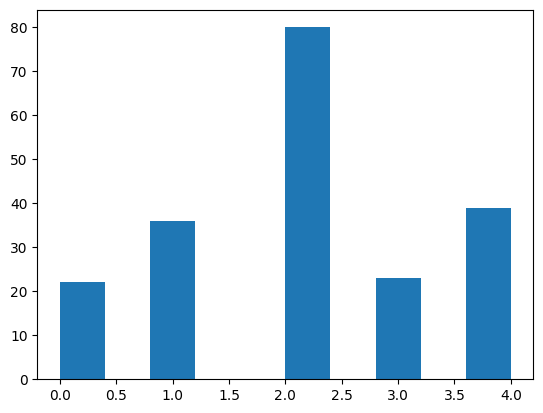

In [11]:
import matplotlib.pyplot as plt
plt.hist(labels)
plt.show()

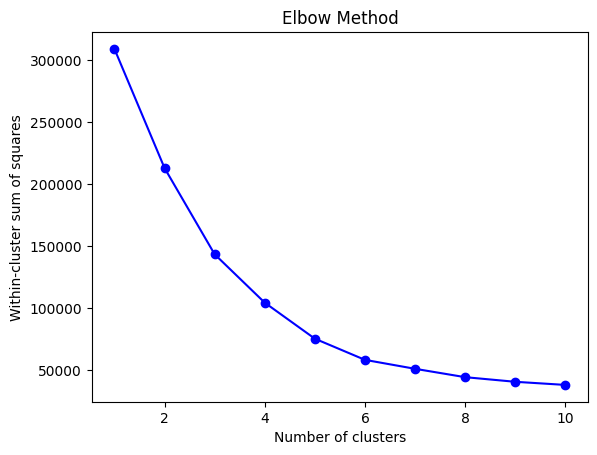

In [19]:
#applying elbow method and finding the optimal number clusters for the given dataset
ws = []                 #within cluster sum of squares for different values of k(ws)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    ws.append(kmeans.inertia_)

# Plot the within-cluster sum of squares
plt.plot(range(1, 11), ws, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()

In [13]:
#perform k-means clustering using sklearn with optimal number of clusters
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(data)

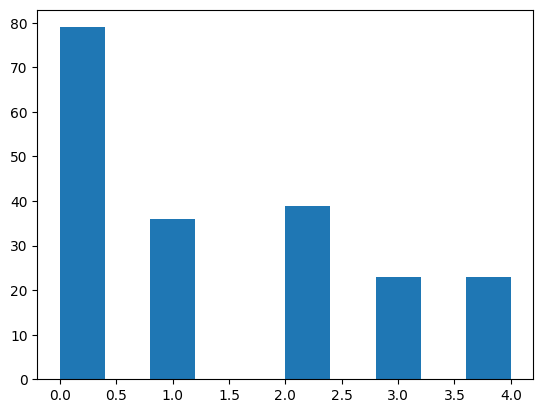

In [14]:
plt.hist(labels)
plt.show()

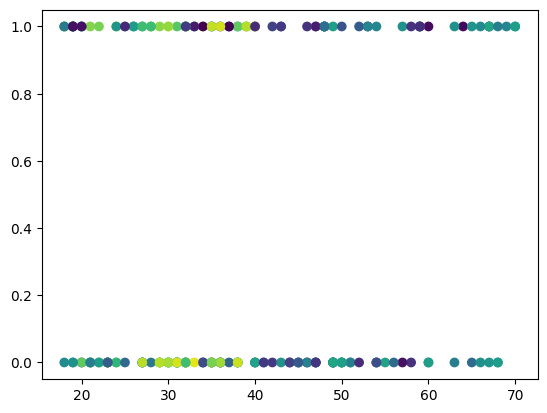

In [15]:
plt.scatter(data['Age'],data['Gender'], c=data['Spending Score'])

In [16]:
import pandas as pd
data = pd.DataFrame(data)

correlation_matrix = pd.DataFrame(data.corr())
print("Correlation matrix between features : \n")
print(correlation_matrix)
print()
print("Correlation between features and spending scores : \n")
corr = pd.DataFrame(data.corr()['Spending Score'])
print(corr)

Correlation matrix between features : 

                  Gender       Age  Annual Income  Spending Score
Gender          1.000000  0.060867       0.056410       -0.058109
Age             0.060867  1.000000      -0.012398       -0.327227
Annual Income   0.056410 -0.012398       1.000000        0.009903
Spending Score -0.058109 -0.327227       0.009903        1.000000

Correlation between features and spending scores : 

                Spending Score
Gender               -0.058109
Age                  -0.327227
Annual Income         0.009903
Spending Score        1.000000


In [17]:
# Select the top 5 features that are most correlated with Spending Score
features = corr.index[:5]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(data[features])

(array([36.,  0., 80.,  0.,  0., 22.,  0., 39.,  0., 23.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

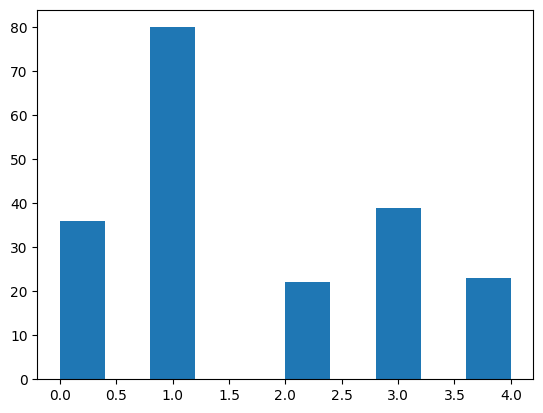

In [18]:
#conclusion from the clustering process
plt.hist(labels)